## Question 2

Generate 
$N
=
1000$
 data points that are drawn from a mixture of 
$K
=
5$
 one-dimensional Gaussians. You can either set the model parameters 
$\theta 
=
\{
\mu
,
\sigma
,
\pi
\}$
 yourself, or set them randomly.

If you set them randomly, remember to seed the random number generator directly before creating the random values.

QUESTION 2, PART A

Specify the model.

QUESTION 2, PART B

Choose an initial guess for 
$\theta$
 that is 'far' away from the true values.

Provide and explain the equation for membership probabilities for each of the 
$N$
 data points to each of the 
$K$
 mixtures, and calculate these membership probabilities conditioned on the initial estimate of the model parameters given above.

Provide and explain the equation for updating the model parameters, conditioned on some set of membership probabilities. Calculate new estimates of the model parameters 
$\theta
=
\{
\mu
,
\sigma
,
\pi
\}$
 conditioned on the membership probabilities that you have just calculated.

QUESTION 2, PART C

Write code to calculate what you did in Question 2, Part B, and alternate between the Expectation and Maximization step for 100 iterations. Store the log likelihood with every iteration. Make a plot showing the log likelihood as a function of E-M step.

QUESTION 2, PART D

Make a figure showing the data points, and the probability density for each of the 
K
 mixtures using the model parameters found after 100 E-M steps.



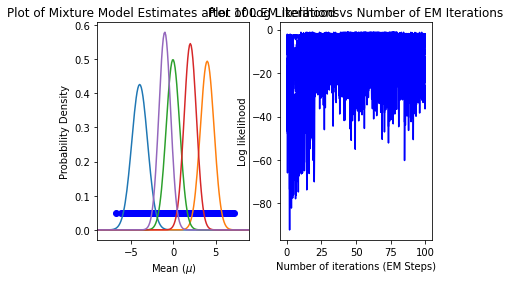

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
np.random.seed(0)


# Generate data
mean1, sigma1, pi1  = -4, np.sqrt(1.2), 0.1 ## Mean and stdev (as sqrt of variance)
mean2, sigma2, pi2= 4, np.sqrt(1.8), 0.1
mean3, sigma3, pi3 = 0, np.sqrt(1.6), 0.2
mean4, sigma4, pi4 = 2, np.sqrt(1.8), 0.4
mean5, sigma5, pi5 = -1, np.sqrt(2), 0.2
n_samples = 1000

true_mean = [mean1, mean2, mean3, mean4, mean5]
true_sigma = [sigma1, sigma2, sigma3, sigma4, sigma5]
true_pi = [pi1, pi2, pi3, pi4, pi5]

true_theta = np.array([true_mean, true_sigma, true_pi])


x1 = np.random.normal(mean1, sigma1, int(n_samples*pi1))
x2 = np.random.normal(mean2, sigma2, int(n_samples*pi2))
x3 = np.random.normal(mean3, sigma3, int(n_samples*pi3))
x4 = np.random.normal(mean4, sigma4, int(n_samples*pi4))
x5 = np.random.normal(mean5, sigma5, int(n_samples*pi5))
X = np.atleast_2d(list(x1) +list(x2) + list(x3)+list(x4)+list(x5))


#Construct initial theta Ansatz (guess)
mean_ansatz = [20, -10, -5, 13, 20]
sigma_ansatz = [7, 2.4, 5.9, 2.1, 8]
pi_ansatz = [0.4, 0.2, 0.1, 0.25, 0.05]

theta_ansatz = np.array([mean_ansatz, sigma_ansatz, pi_ansatz])



# Part(b) Computing the membership probabilities
counter = 0



norm1 = true_pi[0]/sigma1*(np.exp(-((X-mean1)**2/(2*sigma1**2))))
norm2 = true_pi[1]/sigma2*(np.exp(-((X-mean2)**2/(2*sigma2**2))))
norm3 = true_pi[2]/sigma3*(np.exp(-((X-mean3)**2/(2*sigma3**2))))
norm4 = true_pi[3]/sigma4*(np.exp(-((X-mean4)**2/(2*sigma4**2))))
norm5 = true_pi[4]/sigma5*(np.exp(-((X-mean5)**2/(2*sigma5**2))))                                                                        

# Summation in the denominator        
denom_sum = (norm1)+(norm2)+norm3+norm4+norm5

while(counter < 100):

    n_by_k = np.zeros((1000, 5)).T


    for i in range(len(true_mean)):
        n_by_k[i] = (true_pi[i]/true_sigma[i]*np.exp(-(X-true_mean[i])**2/2*true_sigma[i]**2))/denom_sum


    n_by_k = n_by_k.T # Obtain a 1000 by 5 matrix as required
  
    # Update model parameters
    N_k = n_by_k.sum(axis=0)
    new_wnk = N_k/1000
    pi_ansatz = new_wnk
    # Update means
    new_means = ((n_by_k.T @ X.T).T)/N_k
    mean_ansatz = new_means

    #Update sigma
    #y-new_mean matrix
    for k in range(len(new_means)):
        x_minus_new_mean = ((X.T-new_means[k])**2)

    new_sigma = (1/N_k*(n_by_k*(x_minus_new_mean)))
    new_sigma = (np.sqrt(sum(new_sigma)))
    sigma_ansatz = new_sigma

    counter += 1






# Part (d) 
fig, ax = plt.subplots(1,2)
plt.subplot(1,2,1)
val = 0.05 # this is the value where you want the data to appear on the y-axis.
plt.plot(X.T, np.zeros_like(X.T) + val, 'o', c='b')
plt.xlim(-9,9)
x = np.arange(-90, 90, 0.1)

for i in range(5):
    plt.plot(x,stats.norm.pdf(x,new_means[0][i], new_sigma[i]))
    plt.xlabel(r"Mean ($\mu$)")
    plt.ylabel('Probability Density')
    plt.title('Plot of Mixture Model Estimates after 100 EM Iterations')
    
    
plt.subplot(1,2,2)
arg = (-(X.T-new_means)**2)/(2*new_sigma**2)
log_ll = np.log(new_wnk/new_sigma*(np.exp(arg)))

    
x = np.linspace(0, 100, 1000)
plt.plot(x,log_ll, c='b')
plt.xlabel('Number of iterations (EM Steps)')
plt.ylabel('Log likelihood')
plt.title('Plot of Log Likelihood vs Number of EM Iterations')
    
plt.show()

## Question 3
There is overwhelming evidence of anthropogenic climate change. This question relates to what can be inferred from only a subset of the evidence available for global warming: a ficticious set of global temperatures spanning 135 years.

In this file you will find 1,000 fictious time series. Each series has length 135, assuming one measurement per year of temperature deviation from the mean, covering the time period from 1880-2014, inclusive. The data were first generated by drawing 1,000 random series (with some homoscedastic noise). Then, some of those series were randomly selected and had a trend added to them. The trends that were added were either +1°C / century or -1°C / century.

A bet has been offered for anyone who can correctly identify at least 900 series: those that were generated without a trend and which were generated with a trend. The prize is $100,000 US dollars.

QUESTION 3, PART A

Make a figure showing all trend lines with year.

QUESTION 3, PART B

Specify a generative model for these data.

QUESTION 3, PART C

Implement this model in a programming language of your choice, and sample the parameters. Plot the chains. Has your MCMC converged? Plot the posterior probability distributions, and calculate percentiles (5th, 16th, 84th) to quote a mean value and uncertainty in each model parameter.

QUESTION 3, PART D

For each time series, calculate posterior log probabilities of it being an unaffected time series, a time series with +1°C / century added, or a time series with -1°C / century added.

QUESTION 3, PART E

For each time series, find the highest probability of membership from the available mixtures. Sum this value for all time series. This gives an expectation 1 for the number of series you may have estimated correctly:
$$E_\mathrm{correct} \approx \sum_{j=1}^{1000} \max\left(p_{j,k}\right) \quad .$$
The uncertainty 2 for the number of series you have estimated correctly can be calculated by
$$\sigma_\mathrm{correct} \approx \sqrt{\sum_{j=1}^{1000} \left[\max\left(p_{j,k}\right)\left(1-\max\left(p_{j,k}\right)\right)\right]} \quad .$$
How many series do you expect to have calculated correctly? What is the uncertainty on that expectation value?

Question 3, Part F

Assuming a normal distribution, what are the chances that you would correctly identify 900 or more time series as being: an unaffected time series, a time series with +1°C / century added, or a time series with -1°C / century added? If you had to pay $10 to submit an entry to this competition, is it a worthwhile competition to enter (a worthwhile bet)?

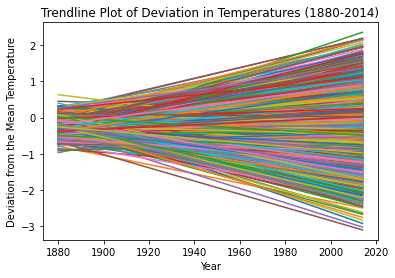

In [2]:
#Part (a)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
gradients = [] # Collect gradients of trendlines
x_ax = np.linspace(1880, 2014, 135)
data = pd.read_csv('/Users/admzlm4/Downloads/temperatures.csv', delim_whitespace = True)
for i in range(len(data)):
    z = np.polyfit(x_ax, data.iloc[i],1)
    p = np.poly1d(z)
    gradients.append(z[0])
    plt.plot(x_ax, p(x_ax))
    plt.xlabel('Year')
    plt.ylabel('Deviation from the Mean Temperature')
    plt.title('Trendline Plot of Deviation in Temperatures (1880-2014)')

In [3]:
import pymc3 as pm
import arviz as az
gradients = np.array(gradients)
#Part (c)

cores = 1
samples = 1000
with pm.Model() as model:
    sigma1 = pm.Uniform("sigma1",0,1)
    sigma2 = pm.Uniform("sigma2",0,1)
    sigma3 = pm.Uniform("sigma3",0,1)
    
    w = pm.Dirichlet('w', a=np.array([1.0, 1.0,1.0]), shape=3)
    norm1 = pm.Normal.dist(mu=0.01, sigma=sigma1)
    norm2 = pm.Normal.dist(mu=0, sigma=sigma2)
    norm3 = pm.Normal.dist(mu=-0.01, sigma=sigma3)
    
    like = pm.Mixture('like', w=w, comp_dists = [norm1, norm2,norm3], observed=gradients)
    start = pm.find_MAP()
    poly_trace = pm.sample(
    samples, 
    start=start,
    cores=cores
    )


<ipython-input-3-54641f8c842d>:20: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  poly_trace = pm.sample(
/Users/admzlm4/opt/anaconda3/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [w, sigma3, sigma2, sigma1]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 9 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/admzlm4/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2000 and the array at index 3 has size 2

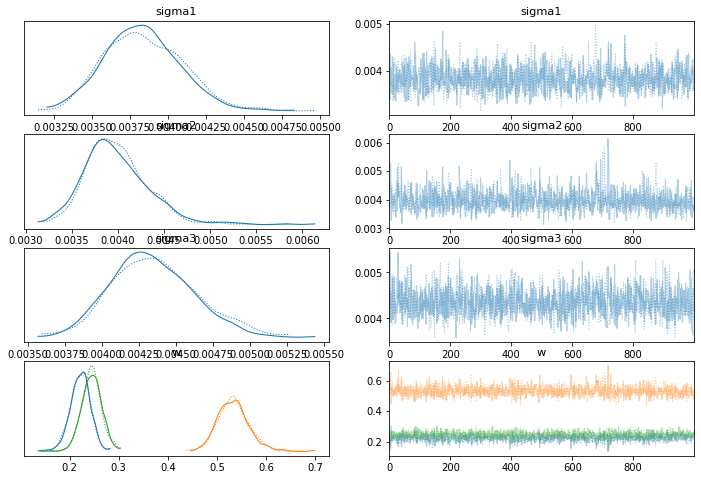

In [4]:
az.plot_trace(poly_trace)
poly_chains = np.vstack([poly_trace.get_values(pn)
for pn in poly_trace.varnames]).T

In [ ]:
# Compute percentiles
display(az.hdi(poly_trace, hdi_prob=0.9))

In [ ]:

display(az.hdi(poly_trace, hdi_prob=0.84)) # This is equivalent to the 84th percentile



In [35]:
# Part (d)
true_mean = [-0.01, 0, 0.01]
true_sigma = [0.004,0.004, 0.004] # true 
true_pi = [0.221, 0.535, 0.244] #true pi values from part c (mixing proportions (included dummy variables))

X = np.array(gradients)

norm1 = true_pi[0]/(true_sigma[0])*(np.exp(-((X-true_mean[0])**2/(2*true_sigma[0]**2))))
norm2 = true_pi[1]/true_sigma[1]*(np.exp(-((X-true_mean[1])**2/(2*true_sigma[1]**2))))
norm3 = true_pi[2]/true_sigma[2]*(np.exp(-((X-true_mean[2])**2/(2*true_sigma[2]**2))))

denom_sum = norm1+norm2+norm3

counter=0


n_by_k = np.zeros((999,3)).T


for i in range(len(true_mean)):
    n_by_k[i] = ((true_pi[i]/true_sigma[i]*np.exp(-(X-true_mean[i])**2/(2*true_sigma[i]**2))))/denom_sum



n_by_k = n_by_k.T # Obtain a 999 by 3 matrix

expected_val_prob_arr = []
uncertainty_prob_arr = []
# Compute Expectation Value
for i in range(len(n_by_k)):
    expected_val_prob_arr.append(max(n_by_k[i]))
expected_val = (sum(expected_val_prob_arr))
print(expected_val)
    
#Compute the uncertainty
for j in range(len(n_by_k)):
    uncertainty_prob_arr.append(max(n_by_k[j])*(1-max(n_by_k[j])))
uncertainty = (np.sqrt(sum(uncertainty_prob_arr)))
print(uncertainty)


856.6719060957332
10.179929022176806


Hence we expect to calculate 856 series correctly with an uncertainty of 10. Assuming a normal distribution, one can compute the following probability to determine the likelihood of correctly predicting the probability:


$$ Pr(X > 900) = Pr (Z > 4.256)$$

where $Z$ represents the standard normal distribution. One obtains a probability of approximately 0.0001 for this. Hence, it is evident that it may not be worth entering the competition as the chances of winning the "bet" appear to be very slim